In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

**Data Loading / Preprocessing :**

i. Loading 

In [ ]:
df = pd.read_csv("churn.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname',], axis=1)

In [ ]:
df.shape

(10000, 11)

In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
X = df.drop(["Exited"], axis=1)
Y = df.Exited

ii. Data Visualization

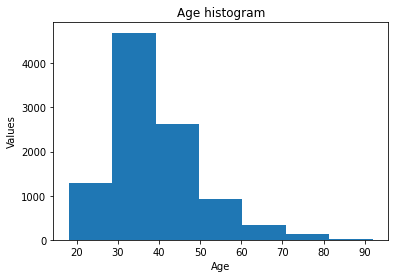

In [ ]:
#Q1
plt.hist(X['Age'], bins=7)
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Age histogram')
plt.show() 

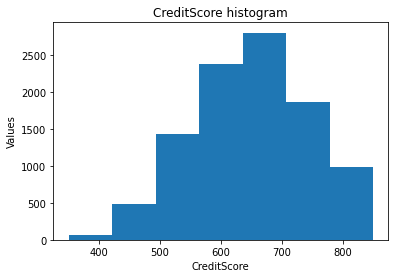

In [ ]:
#Q1
plt.hist(X['CreditScore'], bins=7)
plt.xlabel('CreditScore')
plt.ylabel('Values')
plt.title('CreditScore histogram')
plt.show() 

In [ ]:
#Q1
Mean_Value = df[["Age","CreditScore"]].mean()
print('Mean:-\n',Mean_Value)
Standard_Deviation = df[["Age","CreditScore"]].std()
print('SD:-\n',Standard_Deviation)

Mean:-
 Age             38.9218
CreditScore    650.5288
dtype: float64
SD:-
 Age            10.487806
CreditScore    96.653299
dtype: float64


In [ ]:
# #Calculation for Q2
group_by_gender = df.groupby(['Gender', 'Geography'])
active_by_gender = group_by_gender['IsActiveMember'].sum()
active_by_gender.name = 'Active'
non_active_by_gender = group_by_gender['IsActiveMember'].size() - active_by_gender
non_active_by_gender.name = 'NonActive'
total_by_gender = group_by_gender['IsActiveMember'].size()
total_by_gender.name = 'Total'
active_total_by_gender = pd.concat([active_by_gender,non_active_by_gender,total_by_gender], axis=1)
active_total_by_gender

Active  NonActive  Total
Gender Geography                          
Female France       1162       1099   2261
       Germany       559        634   1193
       Spain         563        526   1089
Male   France       1429       1324   2753
       Germany       689        627   1316
       Spain         749        639   1388

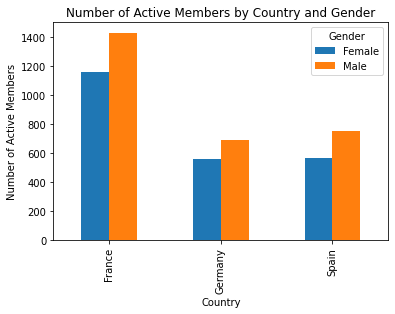

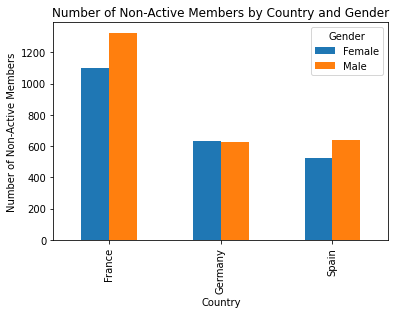

In [ ]:
#Q2
grouped_data = df.groupby(['Gender', 'Geography', 'IsActiveMember'])
active_by_gender = group_by_gender['IsActiveMember'].sum()
count_active = active_by_gender.reset_index(name='Count')
pivot = count_active.pivot_table(index=['Geography'], columns=['Gender'], values='Count')
pivot.plot.bar(title="Number of Active Members by Country and Gender")
plt.xlabel("Country")
plt.ylabel("Number of Active Members")
plt.show()
non_active_by_gender = total_by_gender = group_by_gender['IsActiveMember'].size() - active_by_gender
count_non_active = non_active_by_gender.reset_index(name='Count')
pivot = count_non_active.pivot_table(index=['Geography'], columns=['Gender'], values='Count')
pivot.plot.bar(title="Number of Non-Active Members by Country and Gender")
plt.xlabel("Country")
plt.ylabel("Number of Non-Active Members")
plt.show()

In [ ]:
#Q2
group_by_male = df[df['Gender'] == 'Male'].groupby(['Geography'])
group_by_female = df[df['Gender'] == 'Female'].groupby(['Geography'])
active_by_male = group_by_male['IsActiveMember'].sum()
active_by_male.name = 'Active Males'
non_active_by_male = group_by_male['IsActiveMember'].size() - active_by_male
non_active_by_male.name = 'Non Active Males'
active_by_female = group_by_female['IsActiveMember'].sum()
active_by_female.name = 'Active Females'
non_active_by_female = group_by_female['IsActiveMember'].size() - active_by_female
non_active_by_female.name = 'Non Active Females'
total_by_gender = pd.concat([active_by_male,active_by_female,non_active_by_male,non_active_by_female ], axis=1)
print(active_by_male.France,"Males that are from France and are active members")
print(active_by_female.Spain,"Females that are from Spain and are active members")
print(non_active_by_male.France + non_active_by_male.Germany,"Males that are from France or Germany and are non active members")

1429 Males that are from France and are active members
563 Females that are from Spain and are active members
1951 Males that are from France or Germany and are non active members


Number of rows :- 
0    7963
1    2037
Name: Exited, dtype: int64


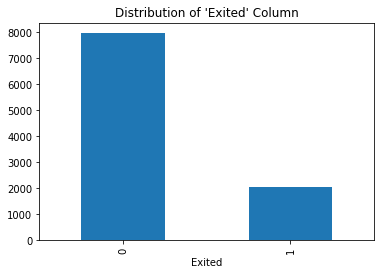

In [ ]:
#Q3
counts = Y.value_counts()
print('Number of rows :- ')
print(counts)
counts.plot.bar(title="Distribution of 'Exited' Column")
plt.xlabel("Exited")
plt.show()

In [ ]:
#Q4
X = pd.get_dummies(X,columns=['Gender','Geography'])
X.shape

(10000, 13)

iii. Data Spliting 

In [ ]:
#spliting the data
X_train, X_test, y_train, y_test= train_test_split(X,df['Exited'],test_size=0.2)

iv. Data Scaling

In [ ]:
#scaling the data using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
9479,0.862,0.229730,0.1,0.000000,0.333333,0,0,0.210265,0,1,0,0,1
61,0.674,0.121622,0.9,0.685340,0.333333,0,0,0.632401,1,0,0,1,0
3954,0.758,0.216216,0.9,0.594426,0.000000,0,1,0.526911,1,0,1,0,0
5434,0.766,0.189189,0.5,0.000000,0.333333,1,0,0.658068,1,0,0,0,1
8892,0.660,0.189189,0.5,0.000000,0.000000,1,1,0.753420,1,0,1,0,0


In [ ]:
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
1855,0.870,0.391892,0.9,0.549030,0.000000,1,1,0.168768,1,0,1,0,0
9284,0.566,0.581081,0.3,0.707262,0.000000,0,1,0.251543,0,1,1,0,0
466,1.000,0.189189,0.9,0.000000,0.333333,1,1,0.094230,1,0,0,0,1
437,0.332,0.229730,1.0,0.468303,0.333333,0,0,0.598237,0,1,1,0,0
6140,0.276,0.175676,0.8,0.439059,0.000000,0,0,0.620973,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8632,0.802,0.324324,0.4,0.000000,0.333333,1,1,0.407005,0,1,1,0,0
6037,0.722,0.189189,0.5,0.000000,0.333333,1,1,0.738592,0,1,0,0,1
6912,0.388,0.405405,1.0,0.352344,0.666667,1,1,0.518429,0,1,1,0,0
443,0.790,0.378378,0.2,0.549878,0.000000,1,1,0.590022,0,1,1,0,0


**Modelling** 

In [ ]:
#model1 using logistic regration
model_1_lr = LogisticRegression()
model_1_lr.fit(X_train, y_train)
y_pred_lr = model_1_lr.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))

0.8105


In [ ]:
#model2 using SVM
model_2_svm=svm.SVC()
model_2_svm.fit(X_train,y_train)
y_pred_svm=model_2_svm.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))

0.828


In [ ]:
#model3 using logistic regression and SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [ ]:
model_3_smote_lr = LogisticRegression()
model_3_smote_lr.fit(X_train_smote, y_train_smote)
y_pred_smote_lr=model_3_smote_lr.predict(X_test)
print(accuracy_score(y_test, y_pred_smote_lr))

0.721


In [ ]:
#model4 using SVM and SMOTE
model_4_smote_svm=svm.SVC()
model_4_smote_svm.fit(X_train_smote,y_train_smote)
y_pred_smote_svm=model_4_smote_svm.predict(X_test)
print(accuracy_score(y_test, y_pred_smote_svm))

0.7825


In [ ]:
#model5 using frid search parameter selection for SVM
param_grid = {"gamma": [0.001, 0.01, 0.1], "C": [1,10,100,1000,10000]}
svc = svm.SVC()
clf = GridSearchCV(estimator = svc, param_grid = param_grid, cv=5, verbose =1, scoring ={'Accuracy':'accuracy','f1s': 'f1'},refit='Accuracy')
clf.fit(X_train_smote, y_train_smote)
y_pred_grids=clf.predict(X_test)
print("best params:- ",clf.best_params_)
print('best score:- ',clf.best_score_)
print('score:- ',clf.score(X_test, y_test))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
best params:-  {'C': 10000, 'gamma': 0.1}
best score:-  0.8257433489827856
score:-  0.7925


**Evaluation** 

In [ ]:
def create_heatmap(cf_matrix):
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

classification reports:-

In [ ]:
#model1
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1573
           1       0.69      0.21      0.32       427

    accuracy                           0.81      2000
   macro avg       0.75      0.59      0.60      2000
weighted avg       0.79      0.81      0.77      2000



In [ ]:
#model2
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1573
           1       0.89      0.22      0.36       427

    accuracy                           0.83      2000
   macro avg       0.86      0.61      0.63      2000
weighted avg       0.84      0.83      0.78      2000



In [ ]:
#model3
print(classification_report(y_test, y_pred_smote_lr))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1573
           1       0.41      0.72      0.52       427

    accuracy                           0.72      2000
   macro avg       0.66      0.72      0.66      2000
weighted avg       0.80      0.72      0.74      2000



In [ ]:
#model4
print(classification_report(y_test, y_pred_smote_svm))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1573
           1       0.49      0.72      0.58       427

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.82      0.78      0.80      2000



confusion matrix 

AxesSubplot(0.125,0.125;0.62x0.755)


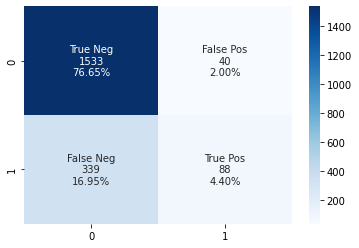

In [ ]:
#model1
cf_matrix_1 = confusion_matrix(y_test, y_pred_lr)
print(create_heatmap(cf_matrix_1))

AxesSubplot(0.125,0.125;0.62x0.755)


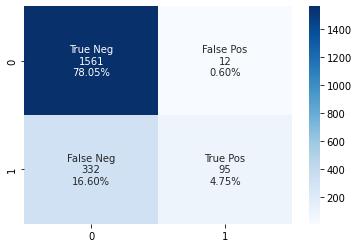

In [ ]:
#model2
cf_matrix_2 = confusion_matrix(y_test, y_pred_svm)
print(create_heatmap(cf_matrix_2))

AxesSubplot(0.125,0.125;0.62x0.755)


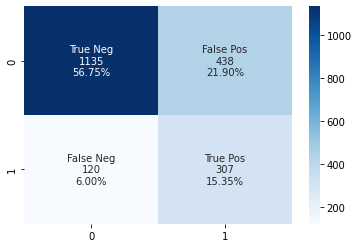

In [ ]:
#model3
cf_matrix_3 = confusion_matrix(y_test, y_pred_smote_lr)
print(create_heatmap(cf_matrix_3))

AxesSubplot(0.125,0.125;0.62x0.755)


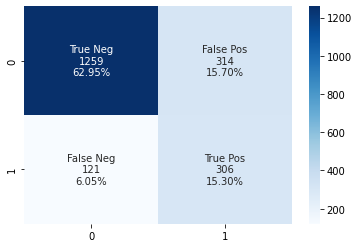

In [ ]:
#model4
cf_matrix_4 = confusion_matrix(y_test, y_pred_smote_svm)
print(create_heatmap(cf_matrix_4))

In [ ]:
#FP and FN for model_1_lr
print('For model_1_lr :- False Positive',cf_matrix_1[0][1],'false Negative',cf_matrix_1[1][0])

For model_1_lr :- False Positive 40 false Negative 339


In [ ]:
#best parameters from the grid search on the training set
clf.best_params_

{'C': 10000, 'gamma': 0.1}

In [ ]:
#best F1 score of the grid search implemented in the fifth model 
clf.best_score_

0.8257433489827856